In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as ex

In [49]:
from sklearn.linear_model import LogisticRegression #This is for logistic regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report,roc_curve,roc_auc_score #Metrics for classification
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE 
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
data=pd.read_excel("D:\\1st\\Lecture notes\\4th Year\\1st Sem\\St 4035 Data science\\Group pro\\Data.xlsx")
data.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,1,7,0,0800-0859,2,1,25,143,Southwest Airlines Co.,13056,...,8,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65,2.91
1,1,7,0,0600-0659,2,1,27,129,Southwest Airlines Co.,13056,...,11,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65,2.91
2,1,7,0,0600-0659,7,1,27,175,Southwest Airlines Co.,13056,...,2,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65,2.91
3,1,7,0,0700-0759,9,1,29,175,Southwest Airlines Co.,13056,...,2,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65,2.91
4,1,7,0,0800-0859,1,1,25,143,Southwest Airlines Co.,13056,...,16,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65,2.91


In [ ]:
data.shape

In [5]:
data[['MONTH', 'DAY_OF_WEEK','DISTANCE_GROUP','SEGMENT_NUMBER']] = data[['MONTH', 'DAY_OF_WEEK','DISTANCE_GROUP','SEGMENT_NUMBER']].astype(object)


In [6]:
data=data.drop('CARRIER_NAME', axis=1)
data=data.drop('FLT_ATTENDANTS_PER_PASS', axis=1)
data=data.drop('AVG_MONTHLY_PASS_AIRLINE', axis=1)
data=data.drop('DEP_TIME_BLK', axis=1)
data=data.drop('GROUND_SERV_PER_PASS', axis=1)


In [ ]:
data.dtypes

In [7]:
data.duplicated().sum()

992

In [8]:
data.drop_duplicates(inplace=True)

In [55]:
#data.isna().sum() 
df=pd.get_dummies(data[["MONTH","DAY_OF_WEEK","DISTANCE_GROUP","SEGMENT_NUMBER","DEPARTING_AIRPORT","PREVIOUS_AIRPORT"]], drop_first=True)
df.head()

,MONTH_2,MONTH_3,DAY_OF_WEEK_2,DAY_OF_WEEK_3,DAY_OF_WEEK_4,DAY_OF_WEEK_5,DAY_OF_WEEK_6,DAY_OF_WEEK_7,DISTANCE_GROUP_2,DISTANCE_GROUP_3,...,PREVIOUS_AIRPORT_Stapleton International,PREVIOUS_AIRPORT_Tampa International,PREVIOUS_AIRPORT_Theodore Francis Green State,PREVIOUS_AIRPORT_Tucson International,PREVIOUS_AIRPORT_Tulsa International,PREVIOUS_AIRPORT_Valley International,PREVIOUS_AIRPORT_Washington Dulles International,PREVIOUS_AIRPORT_Wichita Mid-Continent,PREVIOUS_AIRPORT_Will Rogers World,PREVIOUS_AIRPORT_William P Hobby
0,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#df.drop(["MONTH","DAY_OF_WEEK","DISTANCE_GROUP","SEGMENT_NUMBER","DEPARTING_AIRPORT","PREVIOUS_AIRPORT"],axis=1,inplace=True)
#df.head()

In [56]:
data_new=pd.concat([data,df],axis=1)
data_new.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,...,PREVIOUS_AIRPORT_Stapleton International,PREVIOUS_AIRPORT_Tampa International,PREVIOUS_AIRPORT_Theodore Francis Green State,PREVIOUS_AIRPORT_Tucson International,PREVIOUS_AIRPORT_Tulsa International,PREVIOUS_AIRPORT_Valley International,PREVIOUS_AIRPORT_Washington Dulles International,PREVIOUS_AIRPORT_Wichita Mid-Continent,PREVIOUS_AIRPORT_Will Rogers World,PREVIOUS_AIRPORT_William P Hobby
0,1,7,0,2,1,0.494273,-0.609856,0.781515,0.757073,5873,...,0,0,0,0,0,0,0,0,0,0
1,1,7,0,2,1,0.635759,-1.574591,0.781515,0.757073,5873,...,0,0,0,0,0,0,0,0,0,0
2,1,7,0,7,1,0.635759,1.595251,0.781515,0.757073,5873,...,0,0,0,0,0,0,0,0,0,0
3,1,7,0,9,1,0.777244,1.595251,0.781515,0.757073,5873,...,0,0,0,0,0,0,0,0,0,0
4,1,7,0,1,1,0.494273,-0.609856,0.781515,0.757073,5873,...,0,0,0,0,0,0,0,0,0,0


In [12]:
data_new.shape

(207095, 204)

In [57]:
data_new.drop(["MONTH","DAY_OF_WEEK","DISTANCE_GROUP","SEGMENT_NUMBER","DEPARTING_AIRPORT","PREVIOUS_AIRPORT"],axis=1,inplace=True)

In [14]:
data_new.head()

,DEP_DEL15,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,PLANE_AGE,LATITUDE,LONGITUDE,...,PREVIOUS_AIRPORT_Stapleton International,PREVIOUS_AIRPORT_Tampa International,PREVIOUS_AIRPORT_Theodore Francis Green State,PREVIOUS_AIRPORT_Tucson International,PREVIOUS_AIRPORT_Tulsa International,PREVIOUS_AIRPORT_Valley International,PREVIOUS_AIRPORT_Washington Dulles International,PREVIOUS_AIRPORT_Wichita Mid-Continent,PREVIOUS_AIRPORT_Will Rogers World,PREVIOUS_AIRPORT_William P Hobby
0,0,25,143,13056,107363,5873,1903352,8,36.08,-115.152,...,0,0,0,0,0,0,0,0,0,0
1,0,27,129,13056,107363,5873,1903352,11,36.08,-115.152,...,0,0,0,0,0,0,0,0,0,0
2,0,27,175,13056,107363,5873,1903352,2,36.08,-115.152,...,0,0,0,0,0,0,0,0,0,0
3,0,29,175,13056,107363,5873,1903352,2,36.08,-115.152,...,0,0,0,0,0,0,0,0,0,0
4,0,25,143,13056,107363,5873,1903352,16,36.08,-115.152,...,0,0,0,0,0,0,0,0,0,0


In [58]:
y = data_new['DEP_DEL15'].copy()
x = data_new.drop('DEP_DEL15', axis=1).copy()

In [ ]:
x

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# Class imbalance

In [60]:
smt=SMOTE()

In [61]:
x_sm,y_sm=smt.fit_resample(x_train,y_train)

In [62]:
y_sm.value_counts()

0    130226
1    130226
Name: DEP_DEL15, dtype: int64

In [63]:
x_train=x_sm
y_train=y_sm

# Modeling

In [64]:
model=RandomForestClassifier()

In [65]:
m=model.fit(x_train,y_train)

In [66]:
y_pred=m.predict(x_train)
y_pred

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [67]:
confusion_matrix(y_train,y_pred)

array([[130201,     25],
       [    54, 130172]], dtype=int64)

In [68]:
accuracy=(np.diag(confusion_matrix(y_train,y_pred)).sum())/len(y_train)
accuracy

0.999696681154301

In [69]:
accuracy_score(y_train,y_pred)

0.999696681154301

In [70]:
y_pred=m.predict(x_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [71]:
confusion_matrix(y_test,y_pred)

array([[28662,  3954],
       [ 5431,  3372]], dtype=int64)

In [72]:
accuracy=(np.diag(confusion_matrix(y_test,y_pred)).sum())/len(y_test)
accuracy

0.7734131678698182

In [ ]:
#data['DAY_OF_WEEK'].value_counts()

In [ ]:
#data['FLT_ATTENDANTS_PER_PASS'].value_counts()

In [ ]:
#data['AVG_MONTHLY_PASS_AIRLINE'].value_counts()

In [ ]:
#data = onehot_encode(data, 'DEPARTING_AIRPORT', prefix='D_Air')

# Feature importance

<AxesSubplot:>

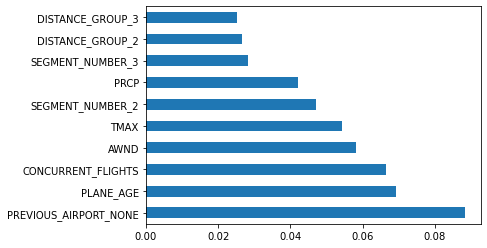

In [32]:
(pd.Series(m.feature_importances_, index=x_train.columns)
   .nlargest(10)
   .plot(kind='barh')) 

# parameter optimization

In [75]:
params

{'n_estimators': [10, 50, 100, 150, 200], 'criterion': ['gini', 'entropy']}

In [76]:
#n_estimator
params = {'n_estimators':[10,50,100,150,200],'criterion':['gini','entropy']}
cv=KFold(n_splits=5, shuffle=True)

In [78]:
# max_features
params = {'max_features':[4,5,6,7,10,15],'criterion':['gini','entropy']}
cv=KFold(n_splits=5, shuffle=True)

In [39]:
# min_samples_leaf
params = {'min_samples_leaf':[15,18,20,22,25],'criterion':['entropy']}
cv=KFold(n_splits=5, shuffle=True)

In [41]:
#min_samples_split': 2
params = {'min_samples_split':[2,3,4,5,10],'criterion':['entropy']}
cv=KFold(n_splits=5, shuffle=True)

In [42]:
# max_depth 18, {22}, 50
params = {'max_depth':[15,18,20,22],'criterion':['entropy']}
cv=KFold(n_splits=5, shuffle=True)

In [43]:
# n_jobs = 1
params = {'n_jobs':[1,2,3],'criterion':['entropy']}
cv=KFold(n_splits=5, shuffle=True)

In [44]:
orf = RandomForestClassifier(criterion='entropy',n_estimators=150,max_features=7,max_depth=22,min_samples_leaf=22,random_state=0)

In [79]:
orf = RandomForestClassifier(random_state=0)

In [80]:
gsearch = GridSearchCV(orf,params,cv=cv)
results = gsearch.fit(x_train,y_train)
results.best_params_

KeyboardInterrupt: 

In [46]:
orf_model = orf.fit(x_train,y_train)

orf_train_pred = orf_model.predict(x_train)
confusion_matrix(y_train,orf_train_pred)

array([[114479,  15747],
       [ 29799, 100427]], dtype=int64)

In [47]:
orf_train_pred = orf_model.predict(x_test)
confusion_matrix(y_test,orf_train_pred)

array([[28512,  4104],
       [ 5809,  2994]], dtype=int64)

In [48]:
accuracy_score(y_test,orf_train_pred)

0.760665395108525

In [53]:
data.dtypes

MONTH                             object
DAY_OF_WEEK                       object
DEP_DEL15                          int64
DISTANCE_GROUP                    object
SEGMENT_NUMBER                    object
CONCURRENT_FLIGHTS                 int64
NUMBER_OF_SEATS                    int64
AIRPORT_FLIGHTS_MONTH              int64
AIRLINE_FLIGHTS_MONTH              int64
AIRLINE_AIRPORT_FLIGHTS_MONTH      int64
AVG_MONTHLY_PASS_AIRPORT           int64
PLANE_AGE                          int64
DEPARTING_AIRPORT                 object
LATITUDE                         float64
LONGITUDE                        float64
PREVIOUS_AIRPORT                  object
PRCP                             float64
SNOW                             float64
SNWD                             float64
TMAX                               int64
AWND                             float64
dtype: object

# Scaling

In [50]:
std_scaler= StandardScaler()

In [54]:
data['CONCURRENT_FLIGHTS']=std_scaler.fit_transform(data[['CONCURRENT_FLIGHTS']])
data['NUMBER_OF_SEATS']=std_scaler.fit_transform(data[['NUMBER_OF_SEATS']])
data['AIRPORT_FLIGHTS_MONTH']=std_scaler.fit_transform(data[['AIRPORT_FLIGHTS_MONTH']])
data['AIRLINE_FLIGHTS_MONTH']=std_scaler.fit_transform(data[['AIRLINE_FLIGHTS_MONTH']])
data['AVG_MONTHLY_PASS_AIRPORT']=std_scaler.fit_transform(data[['AVG_MONTHLY_PASS_AIRPORT']])
data['PLANE_AGE']=std_scaler.fit_transform(data[['PLANE_AGE']])
data['LATITUDE']=std_scaler.fit_transform(data[['LATITUDE']])
data['LONGITUDE']=std_scaler.fit_transform(data[['LONGITUDE']])
data['PRCP']=std_scaler.fit_transform(data[['PRCP']])
data['SNOW']=std_scaler.fit_transform(data[['SNOW']])
data['SNWD']=std_scaler.fit_transform(data[['SNWD']])
data['TMAX']=std_scaler.fit_transform(data[['TMAX']])
data['AWND']=std_scaler.fit_transform(data[['AWND']])

In [ ]:
# y = data_new['DEP_DEL15'].copy()
# x = data_new.['PREVIOUS_AIRPORT_NONE','PLANE_AGE','CONCURRENT_FLIGHTS','AWND','TMAX','SEGMENT_NUMBER_2','PRCP', axis=1].copy()

In [ ]:
#x = data_new[['PREVIOUS_AIRPORT_NONE','PLANE_AGE','CONCURRENT_FLIGHTS','AWND','TMAX','SEGMENT_NUMBER_2','PRCP']]

In [ ]:
#y = data_new['DEP_DEL15'].copy()

In [ ]:
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
#smt=SMOTE()

In [ ]:
#x_sm,y_sm=smt.fit_resample(x_train,y_train)

In [ ]:
# x_train=x_sm
# y_train=y_sm

In [ ]:
#model.fit(x_train,y_train)

In [ ]:
# y_pred=model.predict(x_test)
# y_pred

In [ ]:
#confusion_matrix(y_test,y_pred)

In [ ]:
#accuracy_score(y_test,y_pred)

In [ ]:
#data.dtypes

In [ ]:
# import matplotlib.pyplot as plt
# %matplotlib inline

In [ ]:
# plt.boxplot(data['SNOW'])
# plt.show()